In [12]:
!git clone https://github.com/h3ndrik/streaming-llm.git

fatal: destination path 'streaming-llm' already exists and is not an empty directory.


In [13]:
# Install Miniconda
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local

# Update Conda
!conda update -n base -c defaults conda -y

# Add Conda to PATH
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages/')


--2023-10-31 11:39:56--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120771089 (115M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh.1’

Miniconda3-latest-L 100%[===================>] 115.18M   194MB/s    in 0.6s    

2023-10-31 11:39:57 (194 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh.1’ saved [120771089/120771089]

PREFIX=/usr/local
Unpacking payload ...
                                                                            
Installing base environment...





Preparing transaction: - done
Executing transaction: | done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
  

In [14]:
print(sys.executable)

/usr/bin/python3


In [15]:
!conda create -yn streaming python=3.8

Solving environment: / done

## Package Plan ##

  environment location: /usr/local/envs/streaming

  added / updated specs:
    - python=3.8


The following NEW packages will be INSTALLED:

  _libgcc_mutex      pkgs/main/linux-64::_libgcc_mutex-0.1-main 
  _openmp_mutex      pkgs/main/linux-64::_openmp_mutex-5.1-1_gnu 
  ca-certificates    pkgs/main/linux-64::ca-certificates-2023.08.22-h06a4308_0 
  ld_impl_linux-64   pkgs/main/linux-64::ld_impl_linux-64-2.38-h1181459_1 
  libffi             pkgs/main/linux-64::libffi-3.4.4-h6a678d5_0 
  libgcc-ng          pkgs/main/linux-64::libgcc-ng-11.2.0-h1234567_1 
  libgomp            pkgs/main/linux-64::libgomp-11.2.0-h1234567_1 
  libstdcxx-ng       pkgs/main/linux-64::libstdcxx-ng-11.2.0-h1234567_1 
  ncurses            pkgs/main/linux-64::ncurses-6.4-h6a678d5_0 
  openssl            pkgs/main/linux-64::openssl-3.0.11-h7f8727e_2 
  pip                pkgs/main/linux-64::pip-23.3-py38h06a4308_0 
  python             pkgs/main/linux-64::pyth

In [16]:
# !source ~/anaconda3/etc/profile.d/conda.sh
!conda init bash


no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.11/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
no change     /root/.bashrc
No action taken.


In [17]:
!source activate streaming


In [18]:
!pip3 install torch torchvision torchaudio
!pip3 install transformers==4.33.3 accelerate datasets evaluate wandb scikit-learn scipy sentencepiece

In [19]:
%cd /content/streaming-llm

/content/streaming-llm


In [20]:
!pwd

/content/streaming-llm


In [21]:
!python3 setup.py develop


running develop
/usr/local/lib/python3.11/site-packages/setuptools/command/develop.py:40: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://github.com/pypa/setuptools/issues/917 for details.
        ********************************************************************************

!!
  easy_install.initialize_options(self)
/usr/local/lib/python3.11/site-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog

In [22]:
# Parameters
model_url = "lmsys/vicuna-7b-v1.5" # @param ["lmsys/vicuna-7b-v1.5", "NousResearch/Nous-Capybara-3B-V1.9", "lmsys/vicuna-13b-v1.3"] {allow-input: true}

!CUDA_VISIBLE_DEVICES=0 python3 examples/run_streaming_llama.py  --enable_streaming --model_name_or_path {model_url}

Loading model from lmsys/vicuna-7b-v1.5 ...
Loading checkpoint shards: 100% 2/2 [01:02<00:00, 31.49s/it]
Loading data from data/mt_bench.jsonl ...
StartRecentKVCache: 4, 2000

USER: Compose an engaging travel blog post about a recent trip to Hawaii, highlighting cultural experiences and must-see attractions.

ASSISTANT: 🌴🌊🌞🌈🌏🌴🌊🌞🌈🌏

Hawaii, the 50th state of the United States, is a tropical paradise that has been captivating visitors for decades. With its stunning beaches, lush rainforests, and breathtaking volcanoes, the archipelago offers a unique blend of natural beauty and rich cultural heritage.

During my recent trip to Hawaii, I was eager to immerse myself in the local culture and explore the must-see attractions. Here's a glimpse of my journey and the unforgettable experiences I had in the Aloha State.���������������������������������������������������������������������������������������������������������������������������������
Function greedy_generate(LlamaForCausalLM(
  (mode

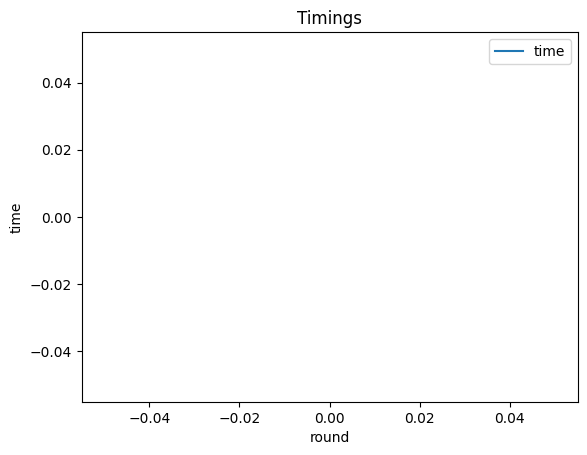

In [23]:
import matplotlib.pyplot as plt
import csv

x = []

with open('timings.csv','r') as csvfile:
    data = csv.reader(csvfile, delimiter = ',')
    for row in data:
        x.append(row[0])

plt.plot(x, label="time")
#plt.plot()

plt.xlabel("round")
plt.ylabel("time")
plt.title("Timings")
plt.legend()
plt.show()